## Задача:
Пьяница стоит на краю утёса на расстоянии двух шагов и делает случайные
шаги вперёд-назад (шаг назад с вероятностью $2/3$, шаг вперёд с вероятностью
$1/3$). Какова вероятность того, что после $5$ шагов пьяница не свалился?
Напишите функцию, принимающую $N$ и возвращающую вероятность того,
что после этих $N$ шагов пьяница жив. Постройте график этой функции.

In [1]:
cache = {}

def fallDownProbability(n, pForward=1/3, distance=2):
    def store(p):
        cache[(n, distance)] = p
        return p
    
    if (n, distance) in cache:
        return cache[(n,distance)]
    
    if distance < 0:
        return store(0)
    if n==0 or n < distance:
        return store(1)
    
    return store((1-pForward)*fallDownProbability(n-1, pForward, distance+1) +
                     pForward*fallDownProbability(n-1, pForward, distance-1))

In [2]:
n = 10
for i in range(1, n+1):
    print(fallDownProbability(i))

1
1.0
0.962962962962963
0.962962962962963
0.9382716049382718
0.9382716049382718
0.9218106995884776
0.9218106995884776
0.9104303205812125
0.9104303205812125


Вероятности для $N = distance + 2k + 1$ и $N = 2k + 2$ совпадают. 
Потомучто если пьяница падает, то он делает $distance$ шагов в сторону пропасти и ещё $2k$. И вероятность такое сотворить одинаковая.
В нашем случае $distance=2$

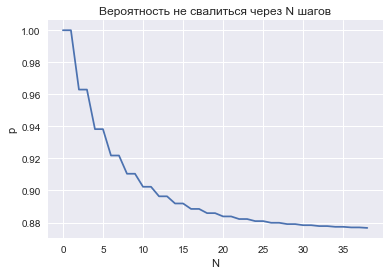

In [3]:
import matplotlib.pyplot as plt
import seaborn # просто для красоты
%matplotlib inline
a = [fallDownProbability(i) for i in range(1, 40)]
plt.plot(a)
plt.xlabel('N')
plt.ylabel('p')
plt.title('Вероятность не свалиться через N шагов')
plt.show()